In [25]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv("data.csv")

In [27]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [28]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [29]:
df.drop(columns=['Place of Review','Month','Reviewer Name','Up Votes','Down Votes','Review Title'], inplace=True)
df

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
3,"Quite O. K. , but nowadays the quality of the...",3
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...
8513,NaN,5
8514,NaN,2
8515,NaN,4
8516,NaN,1


In [30]:
df.dropna(subset='Review text',inplace=True)
df

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
3,"Quite O. K. , but nowadays the quality of the...",3
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...
8505,Delivered before time but price is high from m...,3
8506,up to the mark but same is available in market...,4
8507,Nice delivery speedREAD MORE,5
8508,No complaints about the item . Its the best on...,5


In [31]:
df.isnull().sum()

Review text    0
Ratings        0
dtype: int64

In [32]:
df

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
3,"Quite O. K. , but nowadays the quality of the...",3
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...
8505,Delivered before time but price is high from m...,3
8506,up to the mark but same is available in market...,4
8507,Nice delivery speedREAD MORE,5
8508,No complaints about the item . Its the best on...,5


In [33]:
df['label'] = df['Ratings'].apply(lambda x: 1 if x >3 else 0)
df

,Review text,Ratings,label
0,"Nice product, good quality, but price is now r...",4,1
1,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,Worst product. Damaged shuttlecocks packed in ...,1,0
3,"Quite O. K. , but nowadays the quality of the...",3,0
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1,0
...,...,...,...
8505,Delivered before time but price is high from m...,3,0
8506,up to the mark but same is available in market...,4,1
8507,Nice delivery speedREAD MORE,5,1
8508,No complaints about the item . Its the best on...,5,1


In [34]:
df['Review text'] = df['Review text'].replace(to_replace=r'READ', value='', regex=True)
df

,Review text,Ratings,label
0,"Nice product, good quality, but price is now r...",4,1
1,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,Worst product. Damaged shuttlecocks packed in ...,1,0
3,"Quite O. K. , but nowadays the quality of the...",3,0
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1,0
...,...,...,...
8505,Delivered before time but price is high from m...,3,0
8506,up to the mark but same is available in market...,4,1
8507,Nice delivery speed MORE,5,1
8508,No complaints about the item . Its the best on...,5,1


In [35]:
df.drop_duplicates(inplace=True)
df

,Review text,Ratings,label
0,"Nice product, good quality, but price is now r...",4,1
1,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,Worst product. Damaged shuttlecocks packed in ...,1,0
3,"Quite O. K. , but nowadays the quality of the...",3,0
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1,0
...,...,...,...
8505,Delivered before time but price is high from m...,3,0
8506,up to the mark but same is available in market...,4,1
8507,Nice delivery speed MORE,5,1
8508,No complaints about the item . Its the best on...,5,1


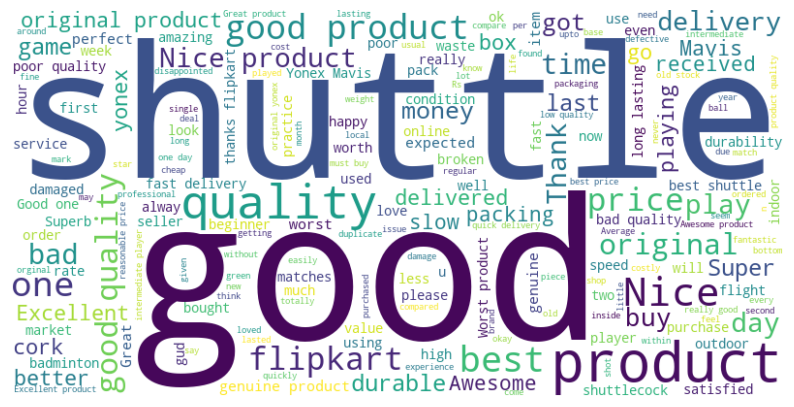

In [36]:
from wordcloud import WordCloud
df = df[df['Review text'].notna()]

# Concatenate all review texts into a single string
text = ' '.join(df['Review text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
df["label"].value_counts()

label
1    3849
0    1392
Name: count, dtype: int64

In [38]:
X=df[["Review text"]]
Y=df["label"]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

# train preprocessing

In [40]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
v=nltk.download("stopwords")
nltk.download("wordnet")
len(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


179

In [68]:
lemmatizer = WordNetLemmatizer()
english_stopwords = set(stopwords.words('english'))
negation_words = {'not', 'no', 'nor', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","don","don't","over"}
custom_stopwords = english_stopwords - negation_words

In [69]:
def preprocess(raw_text):
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    sentence = sentence.lower()

    tokens = sentence.split()
                    
    clean_tokens = [t for t in tokens if t not in custom_stopwords]
    
    clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens)])

In [70]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()
X_preprocess = X_train['Review text'].progress_apply(lambda x: preprocess(x))
X_preprocess

100%|████████████████████████████████████████████████████████████████████████████| 4192/4192 [00:01<00:00, 3051.94it/s]


,0
2858,got genuine product even import stamp say dece...
1644,super
7336,nice deal
6936,good nice product
4502,bad
...,...
5088,item look duplicate doesn look original shuttl...
6233,varry good product
8459,condition
8495,thanks delivery boy service always awesome


In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
vocab= CountVectorizer()

In [73]:
X_train_bow=vocab.fit_transform(X_preprocess[0])
X_train_bow

<4192x2207 sparse matrix of type '<class 'numpy.int64'>'
	with 19250 stored elements in Compressed Sparse Row format>

# test preprocessing

In [74]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()
X_samples = X_test['Review text'].progress_apply(lambda x: preprocess(x))
X_samples

100%|████████████████████████████████████████████████████████████████████████████| 1049/1049 [00:00<00:00, 4656.40it/s]


,0
2918,item note quality
5842,nice n good
1724,good long lasting flight shuttlecock good
7770,delivered right time
1370,mind blowing
...,...
3116,bad product shuttle low quality
1250,super hit
5143,worthy product durable outdoor practice nice p...
5986,good delivery


In [75]:
X_testing=vocab.transform(X_samples[0])
X_testing.shape

(1049, 2207)

# Evaluation

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Define hyperparameters grid for each model
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'SVM': {'C': [0.1, 0.01, 1, 10, 100], 'kernel': ['linear', 'rbf']},
    'Multinomial Naive Bayes': {'alpha': [0.1, 0.5, 1.0]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
    'Decision Tree': {'max_depth': [None, 5, 10]}
}

# Perform grid search and find the best models
best_models = {}
best_hyperparameters = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid=param_grids[name], cv=5)
    grid_search.fit(X_train_bow, y_train)
    best_models[name] = grid_search.best_estimator_
    best_hyperparameters[name] = grid_search.best_params_

# Evaluate the best models
for name, model in best_models.items():
    train_score = model.score(X_train_bow, y_train)
    test_score = model.score(X_testing, y_test)
    print(f"{name}: Training Score = {train_score}, Testing Score = {test_score}")

# Print the best hyperparameters for each model
for name, hyperparameters in best_hyperparameters.items():
    print(f"Best hyperparameters for {name}: {hyperparameters}")


C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic Regression: Training Score = 0.9219942748091603, Testing Score = 0.8627264061010487
KNN: Training Score = 0.8850190839694656, Testing Score = 0.8598665395614872
SVM: Training Score = 0.9420324427480916, Testing Score = 0.8684461391801716
Multinomial Naive Bayes: Training Score = 0.9114980916030534, Testing Score = 0.8617731172545281
Random Forest: Training Score = 0.9756679389312977, Testing Score = 0.8617731172545281
Decision Tree: Training Score = 0.8866889312977099, Testing Score = 0.8560533841754051
Best hyperparameters for Logistic Regression: {'C': 1}
Best hyperparameters for KNN: {'n_neighbors': 7}
Best hyperparameters for SVM: {'C': 1, 'kernel': 'linear'}
Best hyperparameters for Multinomial Naive Bayes: {'alpha': 0.5}
Best hyperparameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Best hyperparameters for Decision Tree: {'max_depth': 10}


In [76]:
from sklearn.svm import SVC
C = 1
kernel = 'linear'  
classifier = SVC(C=C, kernel=kernel)
classifier.fit(X_train_bow, y_train)

SVC(C=1, kernel='linear')

In [77]:
y_test_pred = classifier.predict(X_testing)
y_test_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_test_pred))
print(classifier.score(X_train_bow, y_train))
print(classification_report(y_test, y_test_pred))

0.8684461391801716
0.9420324427480916
              precision    recall  f1-score   support

           0       0.81      0.69      0.75       293
           1       0.89      0.94      0.91       756

    accuracy                           0.87      1049
   macro avg       0.85      0.81      0.83      1049
weighted avg       0.87      0.87      0.87      1049



# testing

In [83]:
sample="i didn't the product" 
test = pd.DataFrame({'sample': [sample]})
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()
X_sample = test["sample"].progress_apply(lambda x: preprocess(x))
X_sample

100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1001.03it/s]


,0
0,didn product


In [84]:
pred=classifier.predict(vocab.transform(X_sample[0]))[0]
if pred==1:
    print("Positive")
else:
    print("negative")

negative


# saving model

In [194]:
import joblib
hyperparameters = {
    'Logistic Regression': {'C': 1},
    'KNN': {'n_neighbors': 7},
    'SVM': {'C': 1, 'kernel': 'linear'},
    'Multinomial Naive Bayes': {'alpha': 0.5},
    'Random Forest': {'max_depth': None, 'n_estimators': 100},
    'Decision Tree': {'max_depth': 10}
}
for name, model in models.items():
    # Set hyperparameters
    model.set_params(**hyperparameters[name])
    
    # Train the model
    model.fit(X_train_bow, y_train)
    
    # Save the model
    model_path = f"{name}_model.joblib"
    joblib.dump(model, model_path)
    print(f"Saved model for {name} at {model_path}")

Saved model for Logistic Regression at Logistic Regression_model.joblib
Saved model for KNN at KNN_model.joblib
Saved model for SVM at SVM_model.joblib
Saved model for Multinomial Naive Bayes at Multinomial Naive Bayes_model.joblib
Saved model for Random Forest at Random Forest_model.joblib
Saved model for Decision Tree at Decision Tree_model.joblib


In [195]:
joblib.dump(vocab, "vectorizer.joblib")

['vectorizer.joblib']